19.09 81.9
10.1 82.46


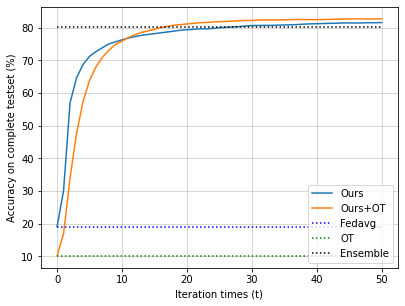

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
lll=1
path = 'True_5mlp_logdata_0_5_mnist'
log = torch.load('./logfinal/'+path)

see = 51
x = np.array(list(range(log['ours']['acc'].shape[0]))[:see])
plt.figure(figsize=(6.4*lll,4.8*lll))

print(log['ours']['acc'][:,-1][0],log['ours']['acc'][:,-1][-1])
print(log['ours_ot']['acc'][:,-1][0],log['ours_ot']['acc'][:,-1][-1])

plt.plot(x,log['ours']['acc'][:,-1][:see])#,color='red')
plt.plot(x,log['ours_ot']['acc'][:,-1][:see])#,color='red')
plt.plot(x,[log['fedavg_acc']]*len(x),linestyle=':',color='blue')
plt.plot(x,[log['ot_acc']]*len(x),linestyle=':',color='green')
plt.plot(x,[log['ensemble_acc']]*len(x),linestyle=':',color='black')

plt.legend(['Ours','Ours+OT','Fedavg','OT','Ensemble'] ,loc = 4)
plt.xlabel('Iteration times (t)')
plt.ylabel('Accuracy on complete testset (%)')
plt.grid(linewidth=0.5)

path = 'image/True_5_mnist.pdf'
# plt.savefig(path,dpi=300,bbox_inches = 'tight')

plt.show()





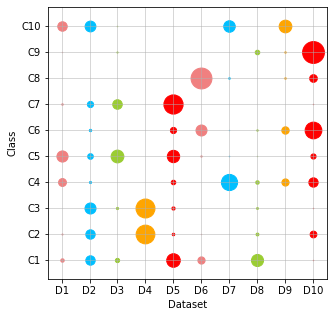

In [16]:
import random
from utils import partition
import matplotlib.pyplot as plt
%matplotlib inline
seed = 3
alpha = 0.1
n_nets = 10
np.random.seed(seed) 
random.seed(seed)
_,dictc=partition(alpha, n_nets ,np.array([i for i in range(10)]*5000))
lll=0.5
plt.figure(figsize=(n_nets*lll,10*lll))
plt.xlim(0.5, n_nets+.5)
cor = ['lightcoral','deepskyblue','yellowgreen','orange','red']
for user in dictc:
    for classn in dictc[user]:
        plt.scatter(int(user)+1,int(classn)+1,s=5000*dictc[user][classn]/50000,color=cor[int(user)%5])
plt.yticks(range(1,11,1),['C'+str(i) for i in range(1,11)])
plt.xticks(range(1,n_nets+1,1),['D'+str(i) for i in range(1,n_nets+1)])
plt.ylabel('Class')
plt.xlabel('Dataset')
plt.grid(linewidth=0.5)
# plt.savefig("image/aaaaa2.pdf",dpi=500,bbox_inches = 'tight')